In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
BATCH_SIZE=64

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
encoder = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXO5EDW/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXO5EDW/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXO5EDW/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_dataset = train_dataset.shuffle(1000).padded_batch(BATCH_SIZE, padded_shapes=((None,), ()))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None,), ()))

In [0]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model_1.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_2.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [0]:
model_1_cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/My Drive/Colab Notebooks/lab7_results/model_1.ckpt",
    save_weights_only=True,
    verbose=1
    )

In [0]:
model_1.fit(train_dataset, 
    epochs=20,
    validation_data=test_dataset,
    validation_steps=30,
    callbacks=[model_1_cp_callback])

Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.6755
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_1.ckpt
391/391 [==============================] - 51s 129ms/step - loss: 0.5885 - accuracy: 0.6755 - val_loss: 0.5437 - val_accuracy: 0.7292
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 0.4053 - accuracy: 0.8288
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_1.ckpt
391/391 [==============================] - 49s 127ms/step - loss: 0.4053 - accuracy: 0.8288 - val_loss: 0.4479 - val_accuracy: 0.8036
Epoch 3/20
391/391 [==============================] - ETA: 0s - loss: 0.3849 - accuracy: 0.8308
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_1.ckpt
391/391 [==============================] - 50s 127ms/step - loss: 0.3849 - accuracy: 0.8308 - val_loss: 0.5026 - val_accuracy: 0.7682
Epoch 4/20
391/391 [=====

In [0]:
model_2_cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/My Drive/Colab Notebooks/lab7_results/model_2.ckpt",
    save_weights_only=True,
    verbose=1
    )

In [0]:
model_2.fit(train_dataset, 
    epochs=30,
    validation_data=test_dataset,
    validation_steps=30,
    callbacks=[model_2_cp_callback])

Epoch 1/30
391/391 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9950
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_2.ckpt
391/391 [==============================] - 81s 207ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.7731 - val_accuracy: 0.8651
Epoch 2/30
391/391 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9973
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_2.ckpt
391/391 [==============================] - 81s 208ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.9489 - val_accuracy: 0.8604
Epoch 3/30
391/391 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9954
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/lab7_results/model_2.ckpt
391/391 [==============================] - 80s 205ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.7234 - val_accuracy: 0.8604
Epoch 4/30
391/391 [=====

In [0]:
model_1.evaluate(test_dataset)

391/391 [==============================] - 20s 52ms/step - loss: 0.6690 - accuracy: 0.8403


[0.6690437197685242, 0.8403199911117554]

In [0]:
model_2.evaluate(test_dataset)

391/391 [==============================] - 34s 88ms/step - loss: 1.0427 - accuracy: 0.8676


[1.0427048206329346, 0.8676400184631348]

In [5]:

!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2020-05-06 07:10:00--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-05-06 07:10:00--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-05-06 07:10:00--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [6]:

!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [0]:
embeddings_index = {}
with open("glove.840B.300d.txt", "r") as in_file:
    for line in in_file:
        values = line.split()
       
        try:
            word = values[0]
            embeddings_index[word] = np.asarray(values[1:], dtype=np.float32)
        except:
            pass

In [14]:
len(embeddings_index)

2195884

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
embedding_matrix = np.zeros((encoder.vocab_size, 300))

# 0 is used for padding in Keras
for index, word in enumerate(encoder.subwords, 1):
    word = word.lower()
    
    # lives_ ==> lives
    if word.endswith("_"):
        word = word[:-1]

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 300, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=True), merge_mode='concat'),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64), merge_mode='concat'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_steps=30,
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
)

Epoch 1/30
391/391 [==============================] - 102s 260ms/step - loss: 0.8900 - accuracy: 0.5340 - val_loss: 0.6765 - val_accuracy: 0.5844
Epoch 2/30
391/391 [==============================] - 101s 258ms/step - loss: 0.7523 - accuracy: 0.5728 - val_loss: 0.7505 - val_accuracy: 0.5073
Epoch 3/30
391/391 [==============================] - 100s 255ms/step - loss: 0.7611 - accuracy: 0.5497 - val_loss: 0.6669 - val_accuracy: 0.5974
Epoch 4/30
391/391 [==============================] - 99s 254ms/step - loss: 0.6757 - accuracy: 0.6037 - val_loss: 0.6617 - val_accuracy: 0.6589
Epoch 5/30
391/391 [==============================] - 100s 257ms/step - loss: 0.6088 - accuracy: 0.6932 - val_loss: 0.5497 - val_accuracy: 0.7401
Epoch 6/30
391/391 [==============================] - 100s 256ms/step - loss: 0.5913 - accuracy: 0.7589 - val_loss: 0.5061 - val_accuracy: 0.7865
Epoch 7/30
391/391 [==============================] - 100s 256ms/step - loss: 0.5951 - accuracy: 0.7216 - val_loss: 0.4396 - 

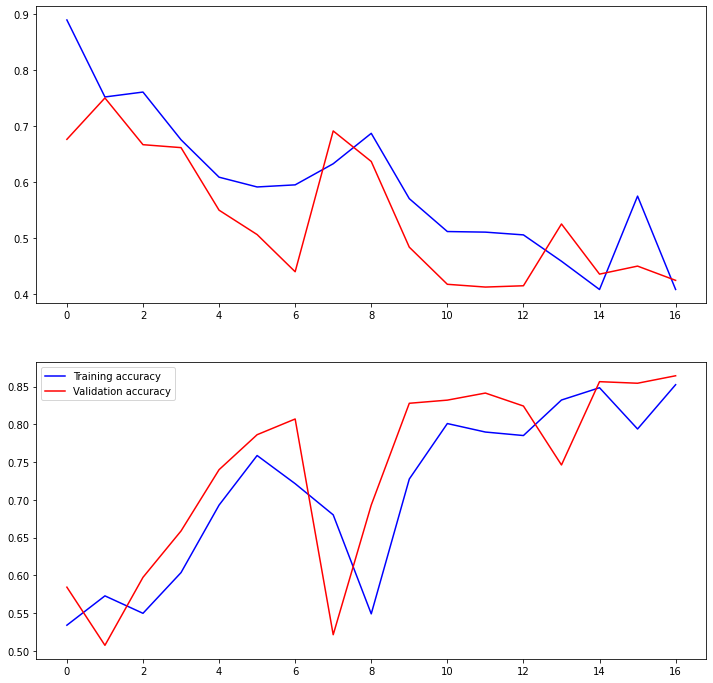

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")

plt.legend()
plt.show()